<a href="https://colab.research.google.com/github/thuthaont/thuthaont.github.io/blob/main/Telco_Customer_Churn_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <b> Telco Customer Churn <br>
<b> <span style="color: #008B8B; font-size: 1.5em;"> Table of contents
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Feature Engineering
5. Building Classifier Models

## 1. Introduction 

### About dataset
This dataset contains information collected randomly from a telecommunications company that provides home phone and Internet services over a period of 12 months. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The dataset indicates which customers have left, stayed, or signed up for their service.

### Content
The Telco Customer Churn dataset includes information about:

- Customers who left within the last month – the column is called <b> Churn </b>
- <b> Services </b> that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- <b> Customer account </b> information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges 
- <b> Demographic info </b> about customers – gender, age range, and if they have partners and dependents </b>

The raw data contains <b> 7043 rows </b> (customers) and <b> 21 columns </b> (features). The <b> “Churn” </b> column is our target.

In [ ]:
# Import some libraries that are used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import os
import warnings

In [ ]:
# Set some initial regulations
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 90)
pd.set_option("display.max_columns", 90 )

### First Look At The Data

In [ ]:
path = 'https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/tele_x/TeleX-Customer-Churn.csv'
telecom_cust = pd.read_csv(path)

In [ ]:
telecom_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 2. Data Wrangling

### 2.1. Data types

First, we check the data types of columns in the dataframe telecom_cust using the method .dtypes. 

In [ ]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It can be seen that the datatype of TotalCharges is <b> object </b>, but the correct datatype for TotalCharges should be <b> float. </b> We change the datatype using the following line: 

In [ ]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

### 2.2. Missing values

We identify missing values by isna() method. 

In [ ]:
telecom_cust.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are <b> only 11 missing values </b> in the TotalCharges column. This is a negligible proportion, therefore we <b> drop </b> the lines with missing TotalCharges value and reset the index. 

In [ ]:
telecom_cust.dropna(inplace=True)
telecom_cust.reset_index(drop=True, inplace=True)

In [ ]:
telecom_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## 3. Exploratory Data Analysis 

In [ ]:
plt.style.use("seaborn")

### 3.1 Customer Information

#### Gender distribution

In [ ]:
telecom_cust['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

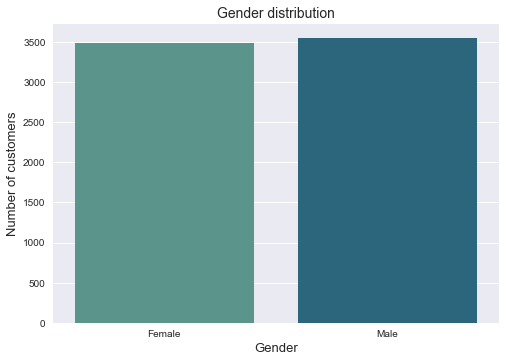

In [ ]:
sns.countplot(x='gender', data=telecom_cust, palette='crest')
plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Number of customers', fontsize = 13)
plt.title('Gender distribution', fontsize = 14)
plt.show()

There are <b> 7032 customers </b> in the dataset, including <b> 3549 males </b> and <b> 3483 females </b>.<br>
The graph also illustrates the proportion of female and male. Specifically, about <b> half </b> of the customers are male while the other <b> half </b> are female. <br>
The number of males who used services from TeleX company is <b> slightly higher </b> than that of females.

#### Senior citizens

In [ ]:
sns.set_style('whitegrid')

Text(0.5, 1.0, '% of Senior Citizens')

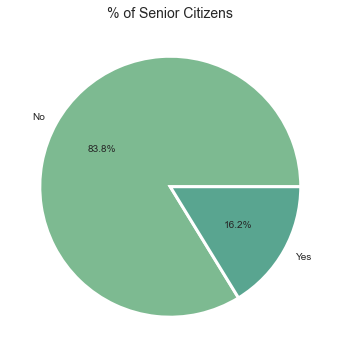

In [ ]:
plt.figure(figsize=(15, 6))
palette_color = sns.color_palette('crest')
plt.pie(telecom_cust['SeniorCitizen'].value_counts(), 
       labels=['No', 'Yes'], colors=palette_color, autopct='%1.1f%%',
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("% of Senior Citizens", fontsize = 14)

Only <b> 16.2% </b> of the customers are senior citizens while more than 80% of the customers are not. It can be implied from this propotion that <b> most </b> of the customers in the dataset are <b> younger people </b>.

#### Partner and dependent status 

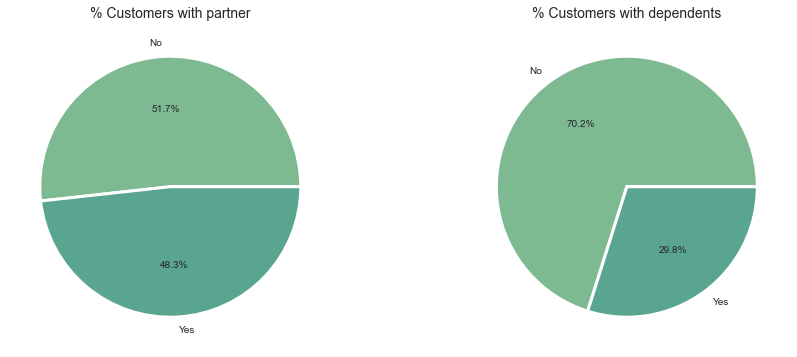

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].pie(telecom_cust['Partner'].value_counts(), 
          labels=telecom_cust['Partner'].value_counts().index, colors=palette_color,
          autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax[0].set_title('% Customers with partner', fontsize = 14)

ax[1].pie(telecom_cust['Dependents'].value_counts(), 
          labels=telecom_cust['Dependents'].value_counts().index, colors=palette_color,
          autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax[1].set_title('% Customers with dependents', fontsize = 14)
plt.show()

The above pie chart shows the percentage of customers with a partner and those with dependents. <b> Almost 50% </b> of the customers have a partner, while <b> only 30% </b> of the total customers have dependents.<br>
It has raised up a question that <b> whether customers with a partner also have dependents </b>. The answer will be firgured out in this below graph.

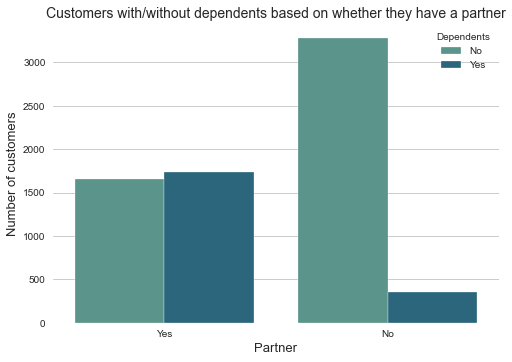

In [ ]:
sns.countplot(x='Partner', hue='Dependents', data=telecom_cust, palette='crest')
plt.ylabel('Number of customers', fontsize = 13)
plt.xlabel('Partner', fontsize = 13)
plt.title('Customers with/without dependents based on whether they have a partner', fontsize = 14)
plt.show()

More than <b> half of the customers who have a partner also have dependents </b>. Besides, as expected, among the customers who do not have partner, a majority of them do not have any dependents, either.

### 3.2. Contract Information

#### Tenure

Text(0.5, 1.0, 'Number of customers by their tenure')

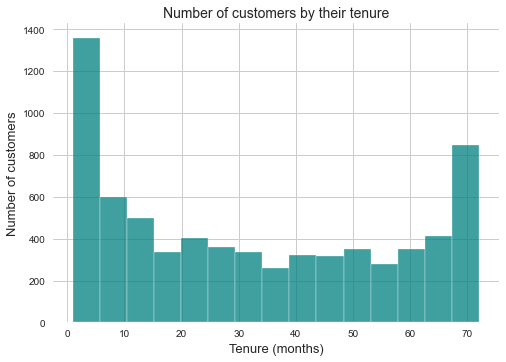

In [ ]:
tenure_plt = sns.histplot(data = telecom_cust['tenure'], color = 'teal') 
tenure_plt.set_ylabel('Number of customers', fontsize = 13)
tenure_plt.set_xlabel('Tenure (months)', fontsize = 13)
tenure_plt.set_title('Number of customers by their tenure', fontsize = 14)

The tenure duration with the highest customer counts is <b> from 1 to 5 months </b>. It means that a lot of customers have used services from the telecom company for just a few months. Surprisingly, the second highest number of customers has been with the telecom company for about <b> 72 months </b>. This could be potentially because different customers have different contracts, which could contribute to customers' decision to stay or leave the telecom company.

#### Contract Type

Text(0.5, 1.0, 'Number of customers by Contract Type')

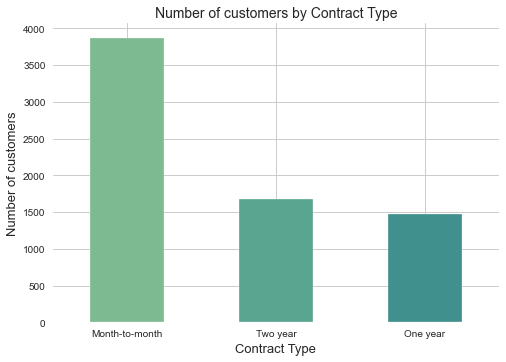

In [ ]:
contracttype_plt = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, color = palette_color)
contracttype_plt.set_ylabel('Number of customers', fontsize = 13)
contracttype_plt.set_xlabel('Contract Type', fontsize = 13)
contracttype_plt.set_title('Number of customers by Contract Type', fontsize = 14)

The above graph shows that most of the customers are in the <b> month to month contract </b>, while the number of customers in the 1 year and 2 year contracts are almost equal. <br>
It may raise up a question about the relationship between tenure and the type of contract. We will see the tenure of customers based on their contract type in the graph below:

#### Tenure by Contract Type

Text(0.5, 1.0, 'Two Year Contract')

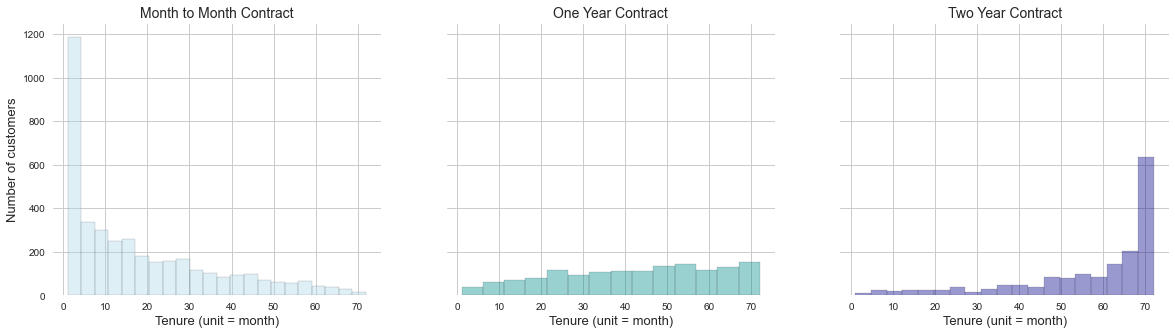

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,5))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'], hist=True, kde=False, color = 'lightblue', hist_kws={'edgecolor':'black'},ax=ax1)
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_xlabel('Tenure (unit = month)', fontsize = 13)
ax.set_title('Month to Month Contract', fontsize = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'], hist=True, kde=False, color = 'darkcyan', hist_kws={'edgecolor':'black'},ax=ax2)
ax.set_xlabel('Tenure (unit = month)', fontsize = 13)
ax.set_title('One Year Contract', fontsize = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'], hist=True, kde=False, color = 'darkblue',hist_kws={'edgecolor':'black'},ax=ax3)
ax.set_xlabel('Tenure (unit = month)', fontsize = 13)
ax.set_title('Two Year Contract', fontsize = 14)

As expected, most of the monthly contracts last for <b> 1-2 months </b>, while the 2 year contracts tend to last for about <b> 72 months </b>. It can be implied that customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### 3.3. Services Used Information

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

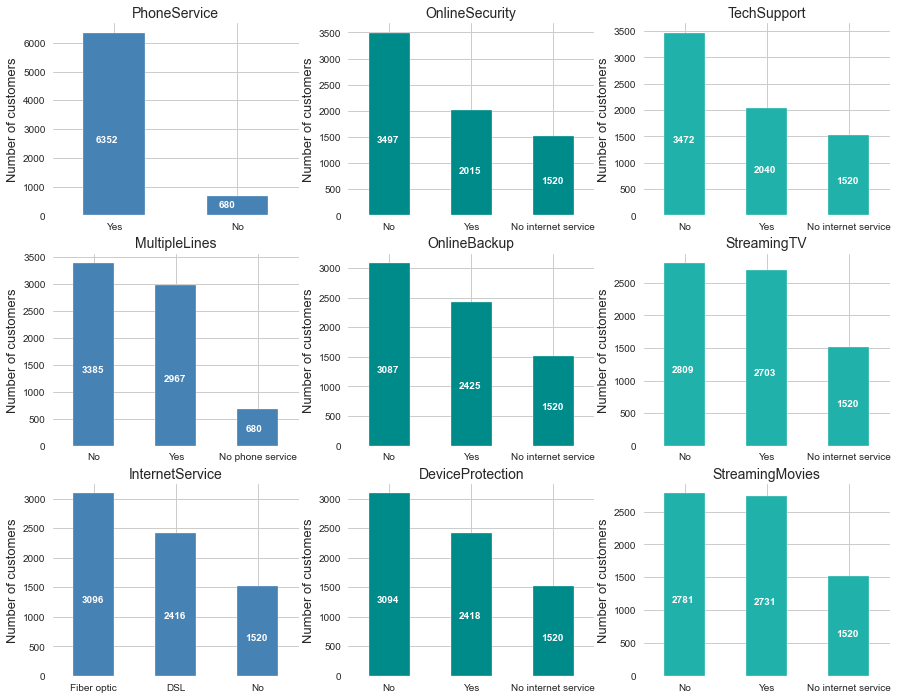

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
enumerate(services)
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = "steelblue")
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = "#008B8B")
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = 'lightseagreen')
    ax.set_title(item, fontsize = 14)
    ax.set_ylabel('Number of customers', fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}'.format(height), (p.get_x()+.20*width, p.get_y()+.4*height), color = 'white', weight = 'bold', size = 10)

Number of people using telephone services are more than those of Internet services. <br>
**Direction for further analysis**: Still need to analyze deeper about number of people using both services at the same time.
<p> Except for Streaming Movies and Streaming TV, customers rarely sign up for other services package while registering for Internet Services. <br>
<b> Direction for further analysis </b>: Need to calculate the Number of additional Internet service packages registered per person (because 1 person can register more than 1 service). </p> 

Text(0.5, 0, 'Number of customers')

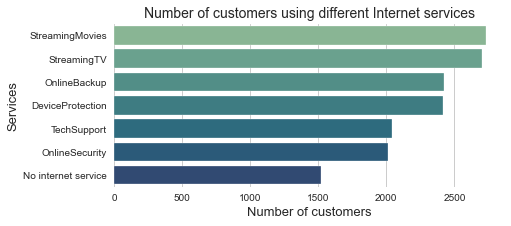

In [ ]:
df = pd.DataFrame({
        'group': ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','No internet service'],
        'value': [2015,2425,2418,2040,2703,2731,1520]})

# Set the figure size
plt.figure(figsize=(7, 3))

# Reorder this data frame
df = df.sort_values(['value'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="value", 
    y="group", 
    data=df, 
    estimator=sum, 
    ci=None, 
    palette="crest"
)
plt.title('Number of customers using different Internet services', fontsize = 14)
plt.ylabel('Services', fontsize = 13)
plt.xlabel('Number of customers', fontsize = 13)

The most favourite services are <b> Streaming Movies are Streaming TV </b>, while those least favourite are <b> Techsupport and Online Security. </b>

### 3.4. Visualize relationship with Churn

#### Let's first look at the churn rate in our data

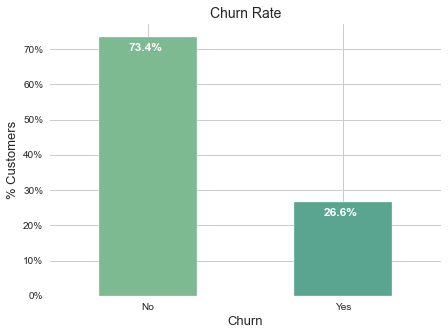

In [ ]:
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar', stacked = True, rot = 0, color = palette_color, figsize = (7,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', fontsize = 13)
ax.set_xlabel('Churn', fontsize = 13)
ax.set_title('Churn Rate', fontsize = 14)

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', weight = 'bold')

In this dataset, <b> 73.4% of the customers do not churn </b>. As a result, <b> the data is skewed </b>, and our modelling with skeweness could lead to a lot of false negatives. We will use oversampling method to avoid skewness in the modeling section later.

#### 3.4.1. Customer information

#### Churn by gender

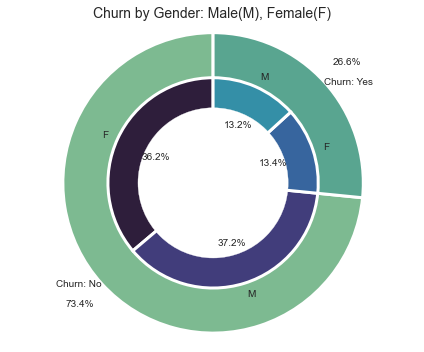

In [ ]:
plt.figure(figsize=(6, 5))
labels =['Churn: No', 'Churn: Yes']
values = telecom_cust['Churn'].value_counts()
labels_gender = ['F', 'M', 'F', 'M']
values_gender = telecom_cust.groupby(['Churn', 'gender'])['gender'].value_counts()
width = 3
plt.pie(values, labels=labels, autopct='%1.1f%%', 
       colors=palette_color, radius=10, startangle=90, pctdistance=1.2, labeldistance=1.0,
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.pie(values_gender, labels=labels_gender, autopct='%1.1f%%',
       colors=sns.color_palette('mako'), radius=10 - width, startangle=90,
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

centre_circle = plt.Circle((0,0),5,color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn by Gender: Male(M), Female(F)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

As it can be seen from the donut plot, <b> 26.6% </b> of customers have switched to another company (churned). <br>
Among the customers who has churned, there is an equality in the number of males and females. Therefore, <b> both genders behaved in a similar way when it comes to change to another service provider. </b>

#### Churn by seniority

Text(0.5, 0, 'Senior Citizen')

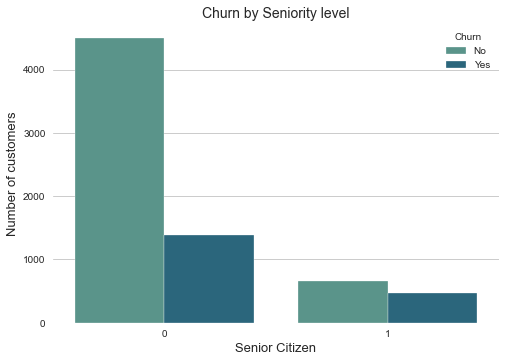

In [ ]:
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=telecom_cust, palette='crest')
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_title('Churn by Seniority level', fontsize = 14)
ax.set_xlabel('Senior Citizen', fontsize = 13)

Although the number of senior citizens is significantly lower than that of their counterpart, their <b> churn rate is significant higher </b>. Therefore senior citizens could be a potential feature to predict churned customers.

#### Churn by partner and dependent status

Text(0.5, 1.0, 'Churn by Dependent status')

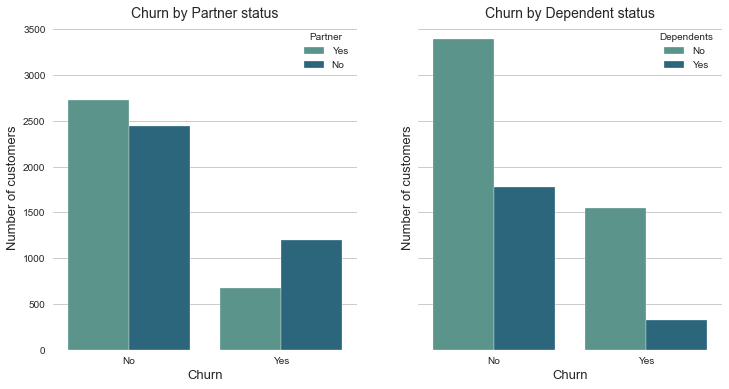

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (12, 6))

ax = sns.countplot(x='Churn', hue='Partner', data=telecom_cust, palette='crest', ax=ax1)
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_xlabel('Churn', fontsize=13)
ax.set_title('Churn by Partner status', fontsize = 14)

ax = sns.countplot(x='Churn', hue='Dependents', data=telecom_cust, palette='crest', ax=ax2)
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_xlabel('Churn',fontsize = 13)
ax.set_title('Churn by Dependent status', fontsize = 14)

It can be observed from the first graph that <b> customers who doesn't have partners are more likely to churn. </b> Additionally, in the second bar chart, <b> customers without dependents are more likely to churn. </b>

#### 3.4.2. Contract information

#### Churn by Contract Tenure

Text(0.5, 1.0, 'Churn by Contract Tenure')

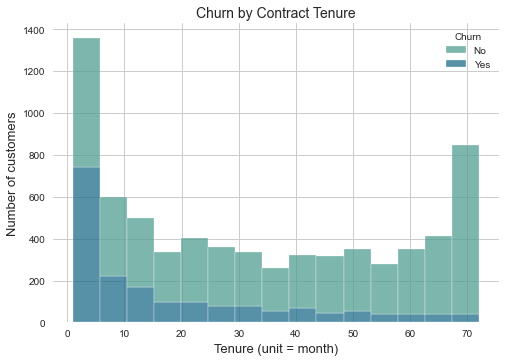

In [ ]:
tenure_churn_rel = sns.histplot(data = telecom_cust, x = 'tenure', hue = 'Churn', multiple="stack", palette = "crest")
tenure_churn_rel.set_ylabel('Number of customers', fontsize = 13)
tenure_churn_rel.set_xlabel('Tenure (unit = month)', fontsize = 13)
tenure_churn_rel.set_title('Churn by Contract Tenure', fontsize = 14)

It can be seen that **the shorter the contract, the more likely it is for a customer to churn.**
This is compatible with the correlation results above.

#### Churn by Monthly Charges

Text(0.5, 1.0, 'Churn by Monthly Charges')

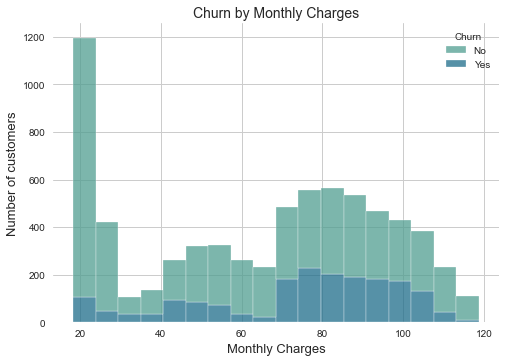

In [ ]:
monthly_churn_rel = sns.histplot(data=telecom_cust, x="MonthlyCharges", hue="Churn", multiple="stack", palette= "crest")
monthly_churn_rel.set_ylabel('Number of customers', fontsize = 13)
monthly_churn_rel.set_xlabel('Monthly Charges', fontsize = 13)
monthly_churn_rel.set_title('Churn by Monthly Charges', fontsize = 14)

It can be seen that the highest Churn rate is among customers who are <b> charged between 70 to 100 per month </b>.
It seems that <b> the higher the monthly charge, the more likely it is for a customer to churn. </b> This also corroborates the correlation results. 

#### 3.4.3. Services used information

Text(0.5, 1.0, 'Churn by InternetService')

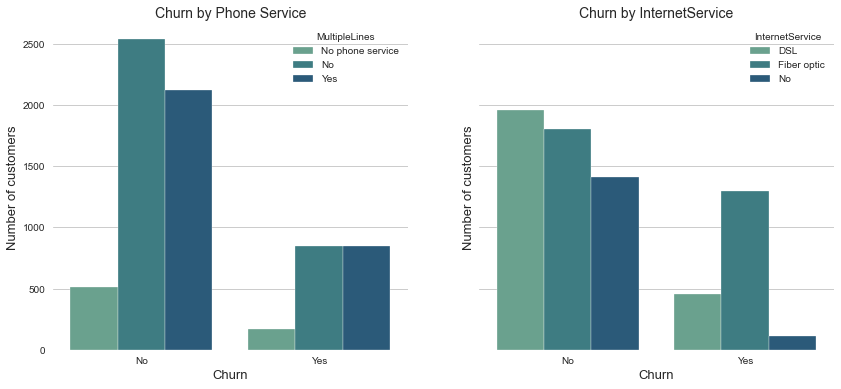

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (14, 6))

ax = sns.countplot(x='Churn', hue='MultipleLines', data=telecom_cust, palette='crest', ax=ax1)
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_xlabel('Churn', fontsize=13)
ax.set_title('Churn by Phone Service', fontsize = 14)

ax = sns.countplot(x='Churn', hue='InternetService', data=telecom_cust, palette='crest', ax=ax2)
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_xlabel('Churn',fontsize = 13)
ax.set_title('Churn by InternetService', fontsize = 14)

The graph shows that Customers using  <b>InternetService with fiber optic as part of their contract have much higher churn rate.</b> It also shows that Customers using <b> PhoneService without Multiple Lines as part of their contract have much higher churn rate.</b>

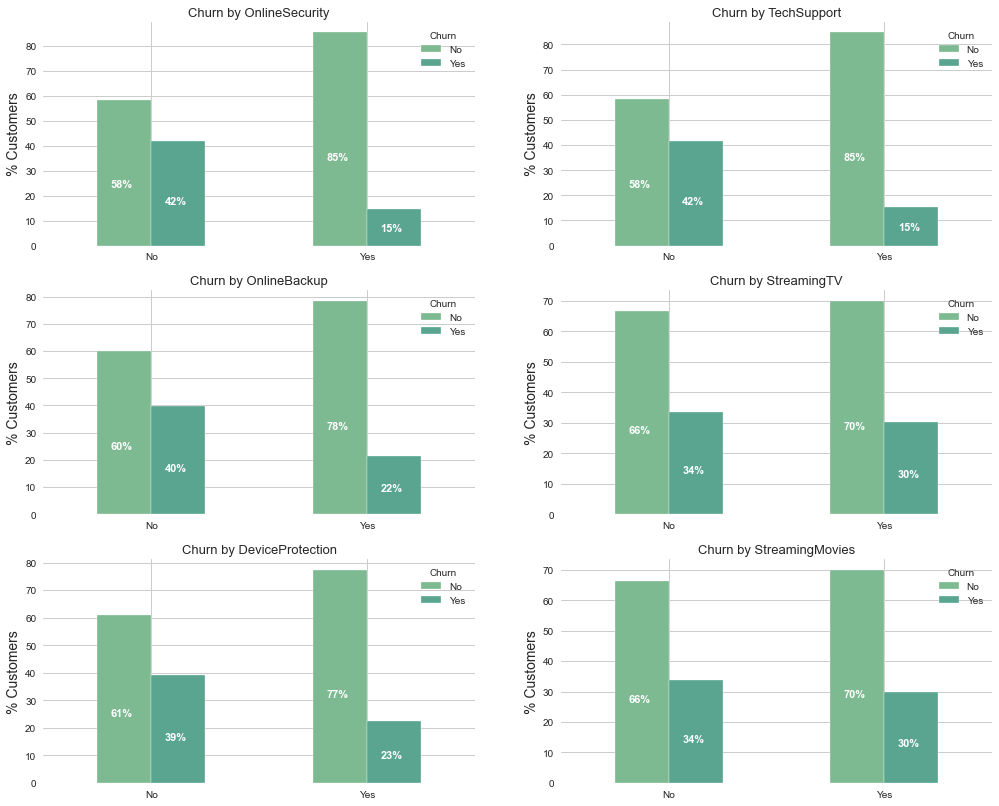

In [ ]:
services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (17,14))
for i, item in enumerate(services):
    if i < 3:
        contract_churn = telecom_cust[telecom_cust[item] != 'No internet service'].groupby([item,'Churn']).size().unstack()

        ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', color = palette_color, ax=axes[i,0],rot = 0)
                                                               
    elif  i < 6:
        contract_churn = telecom_cust[telecom_cust[item] != 'No internet service'].groupby([item,'Churn']).size().unstack()

        ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', color = palette_color, ax=axes[i-3,1],rot = 0)
        
        
    ax.set_title(f'Churn by {item}', fontsize = 13)
    ax.set_xlabel('', fontsize = 13)
    ax.set_ylabel('% Customers', fontsize = 14)
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold', size = 11)

It can be seen from the graph that <b> people who register for the Internet service without signing up for other service packages are more likely to become churn. </b> Besides that, <b> group of people who subcribe for Streaming Movies and Streaming TV has the highest rate of Churn (30%).</b>




Another hypothesis is that people using more additional services will tend to have smaller churn rate.

In [ ]:
telecom_cust["No_AdditionalServices"] = (
        telecom_cust[['MultipleLines', 'OnlineSecurity' , 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ]] == 'Yes').sum(axis = 1)

Text(0.5, 0, 'Number of Additional Services')

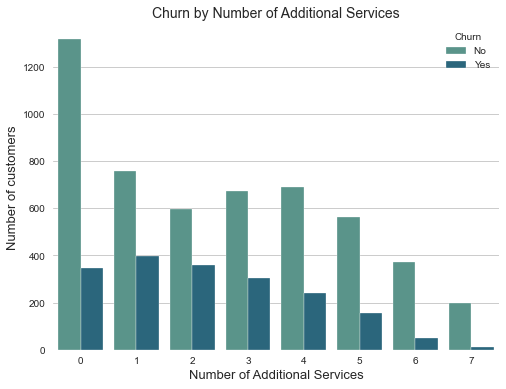

In [ ]:
plt.figure(figsize= (8, 6))
sns.countplot(x = telecom_cust.No_AdditionalServices, hue = telecom_cust.Churn, palette = 'crest')
plt.title('Churn by Number of Additional Services', fontsize = 14)
plt.ylabel('Number of customers', fontsize = 13)
plt.xlabel('Number of Additional Services', fontsize = 13)

It can be seen from the graph that <b> people subcribed more service will have less likelihood to switch over to another service provider. </b>

#### 3.4.4. Payment method

Text(0.5, 0, 'Payment Method')

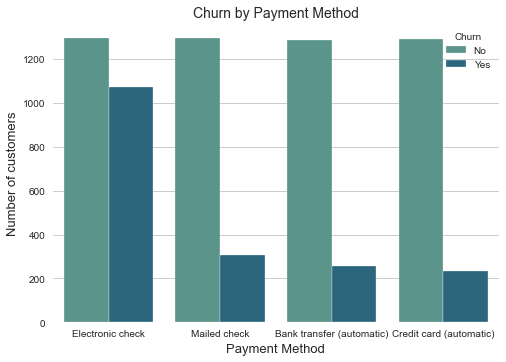

In [ ]:
sns.countplot(telecom_cust.PaymentMethod, hue = telecom_cust.Churn, palette = 'crest')
plt.title('Churn by Payment Method', fontsize = 14)
plt.ylabel('Number of customers', fontsize = 13)
plt.xlabel('Payment Method', fontsize = 13)

It is obvious that customers pay with <b> Electronic check method </b> are much more likely to switch over another service provider

### Summary 
After performing EDA to gain insights from the dataset, here are the noticable features that could help predict churned customers:
 - Customer that <b> subcribed to the service longer </b> will have much lower churn rate
 - Higher monthly charges will dicourage the customers to continue using the service
 - <b> Senior </b> citizens are more likely to churn than non-senior ones.
 - Churn rate for <b> month-to-month contracts </b> much higher that for other contract durations.
 - Moderately higher churn rate for <b>customers without partners </b>.
 - Much higher churn rate for <b>customers without children </b>.
 - <b>Payment method electronic check </b> shows much higher churn rate than other payment methods.
 - Customers using <b>InternetService with fiber optic </b> and <b>PhoneService without Multiple Lines </b> as part of their contract have much higher churn rate.
 - Customers <b> do not register for addtional service packages </b> have higher unsubcribed rate
 
#### Potential features:
 - Senior citizens
 - Month-to-Month Contract
 - Partners
 - Dependents
 - PaymentMethod
 - No Addtional services
 - Monthly Charges
 - Tenure
 - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV

## 4. Feature Engineering

### 4.1. Transforming features

In this part, we will <b> transform the categorical values. </b> We have a lot of categorical variables, some are binary (Yes/No) while most contain three values (Yes/No/No Internet Service). <p>
    We will create a separate dataframe to store <b> ONLY </b> transformed categorical variables. </p>

#### Remove "customerID" feature

First, we remove the customerID column because it is unique for every customer and it does not help to predict the probability of churning.

In [ ]:
df2 = telecom_cust.iloc[:,1:]

In [ ]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No_AdditionalServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,6
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,5
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


#### Transform categorical variables into columns with binary values 0, 1

Next, we transform the values "Yes", "No" in the Churn column into binary values 0,1.

In [ ]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

Now, we will transform categorical variables into columns representing those categories, but using binary values 0,1. These transformed columns will be stored in the dataframe - **out**.

In [ ]:
encoder = OneHotEncoder(drop='if_binary', sparse=False)
dic1 = encoder.fit_transform(df2[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']])

In [ ]:
lst = encoder.get_feature_names_out(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']) 
out = pd.DataFrame(dic1, columns=lst)
out.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Finally, we concatenate:<p>
- The dataframe **out** where columns only contain binary values. </P> 
<p>
- The dataframe **df2** which is similar to the original dataframe telecom_cust without the column customerID. All other columns stay the same, categorical variables have not been transformed. </P> 
We get the dataframe **df_dummies**.

In [ ]:
df_dummies = pd.concat([df2, out], axis=1)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No_AdditionalServices,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Removal of unnecessary variables

Now we **drop the untransformed categorical variables**, leaving only columns representing those categories using binary values. 

In [ ]:
df_dummies.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod'], axis=1, inplace=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,No_AdditionalServices,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


We see that the way of transforming categorical in to numerical variables would create the problem of **multicollinearity** in:
- the columns: InternetService_No and MultipleLines_No <br>
- the columns: MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service' <br>

To be specific: 
- If the value in InternetService_No is 1 
- All the values in the columns ABC_No internet service are also 1 <br>

Therefore, we **ONLY keep the column InternetService_No** and remove all other columns whose name is _No internet service. 

**You may raise a question:** 
The column _No internet service helps to separate: 
- The customers who DO NOT have InternetService (InternetService_No = 1) and therefore do not have OnlineSecurity (OnlineSecurity_Yes = 0), TechSupport... 
- The customer who DO have InternetService (InternerService_No = 0) but do not have Online Security (OnlineSecurity_Yes = 0)... 

But the sole column **InternetService_No can already help us differentiate between the above two customers**, so **all the columns _NoInternetService should be removed**. 

In [ ]:
df_dummies.drop(['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 
                 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 
                 'TechSupport_No internet service', 'StreamingTV_No internet service', 
                 'StreamingMovies_No internet service'], axis=1, inplace=True)

Next, we remove the columns that represent a binary value because the argument drop = if_binary in Encoder has not removed those columns yet. (Because the categorical variables TechSupport, OnlineSecurity,.. had 3 values, not binary)   

In [ ]:
df_dummies.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 
                 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_Yes'], axis=1, inplace=True)

In [ ]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,No_AdditionalServices,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0,72,103.20,7362.90,0,5,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0,11,29.60,346.45,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1,4,74.40,306.60,1,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 4.2. Features selection

#### 4.2.1. Correlation analysis

Text(0, 0.5, 'Correlation')

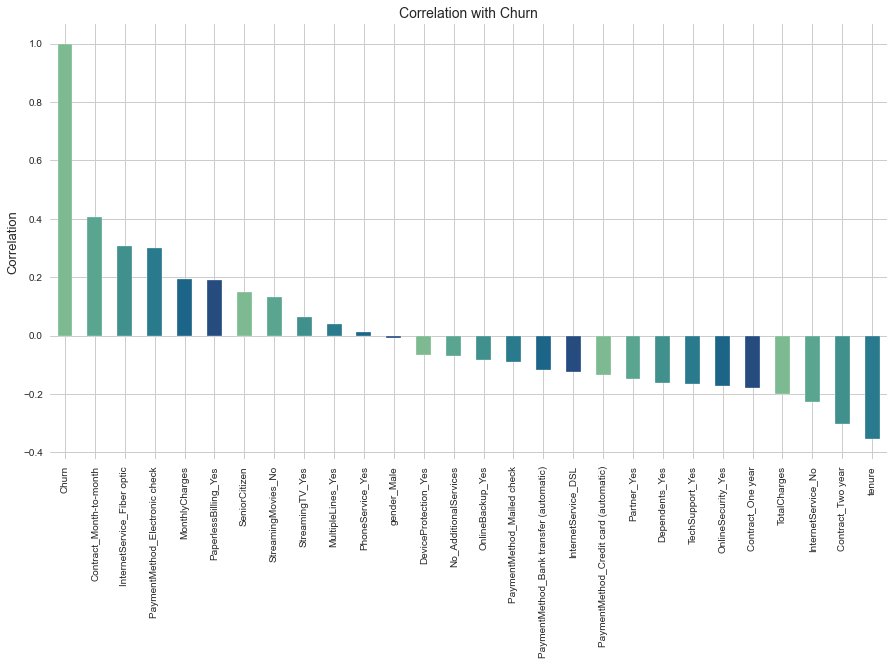

In [ ]:
# bar chart
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = palette_color)
plt.title('Correlation with Churn', fontsize = 14)
plt.ylabel('Correlation', fontsize = 13)

In [ ]:
df_dummies.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,No_AdditionalServices,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.095516,-0.001819,0.016957,-0.210550,0.008392,0.142996,-0.108276,0.254923,-0.182519,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.034196,0.137752,-0.046491,-0.116205,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.527600,0.005285,0.381912,0.163386,0.007877,0.332399,0.013786,0.017930,-0.037529,0.328297,0.361138,0.361520,0.325288,0.280264,-0.252890,-0.649346,0.202338,0.563801,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.773098,-0.013779,0.097825,-0.112343,0.248033,0.490912,-0.161368,0.787195,-0.763191,0.296447,0.441529,0.482607,0.338301,0.629668,0.017271,0.058933,0.004810,-0.073256,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.787082,0.000048,0.319072,0.064653,0.113008,0.469042,-0.052190,0.360769,-0.374878,0.412619,0.510100,0.522881,0.432868,0.515709,-0.202605,-0.446776,0.170569,0.358036,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,-0.069701,-0.008545,-0.149982,-0.163128,0.011691,0.040033,-0.124141,0.307463,-0.227578,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.130920,0.404565,-0.178225,-0.301552,0.191454,-0.118136,-0.134687,0.301455,-0.090773
No_AdditionalServices,0.095516,0.527600,0.773098,0.787082,-0.069701,1.000000,-0.014976,0.219176,0.021635,-0.015333,0.502500,0.171533,0.312035,-0.574222,0.539632,0.611832,0.674646,0.602852,0.683614,-0.202984,-0.284858,0.116363,0.221026,0.204435,0.123454,0.133973,0.036206,-0.293954
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-0.014976,1.000000,-0.001379,0.010349,-0.007515,-0.008883,0.007584,-0.011189,0.004745,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,0.006078,-0.003251,0.007755,-0.003603,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.219176,-0.001379,1.000000,0.452269,0.018397,0.142561,-0.001043,0.001235,-0.000286,0.143346,0.141849,0.153556,0.120206,0.124483,-0.117488,-0.280202,0.083067,0.247334,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,-0.163128,0.021635,0.010349,0.452269,1.000000,-0.001078,-0.024307,0.051593,-0.164101,0.138383,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.078245,-0.229715,0.069222,0.201699,-0.110131,0.052369,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.011691,-0.015333,-0.007515,0.018397,-0.001078,1.000000,0.279530,-0.452255,0.290183,0.171817,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.111273,-0.001243,-0.003142,0.004442,0.016696,0.008271,-0.006916,0.002747,-0.004463


From the correlation analysis, it is clear that the **following variables (whose correlation with Churn is > 0.18)** might be helpful in predicting Churn: 
- tenure 
- MonthlyCharges
- TotalCharges
- InternetService_Fiber optic
- InternetService_No
- Contract_Month-to-month
- Contract_Two year
- PaperlessBilling_Yes
- PaymentMethod_ElectronicCheck

We now attempt to narrow down this list and get the best features using the **Variance Threshold and KBest method**. 

#### 4.2.2. Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

In [ ]:
X_1 = df_dummies.drop(labels = ['Churn'] , axis=1)
Y = df_dummies['Churn']

In [ ]:
#Applying the VarianceThreshold method
vars_thres = VarianceThreshold(threshold= 0)

In [ ]:
vars_thres.fit(X_1)

VarianceThreshold(threshold=0)

In [ ]:
# Number of features removed using VarianceThreshold
(vars_thres.get_support() == False).sum()

0

The **VarianceThreshold method does not suggest the removal of any features**. We move on to use the KBest method. 

#### 4.2.3. KBest Method

In [ ]:
X_1.columns[vars_thres.get_support()]

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_AdditionalServices', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X_sel = X_1[X_1.columns[vars_thres.get_support()]]

In [ ]:
#Applying the KBest method
chi2_stat = SelectKBest(score_func= chi2, k = 10)

In [ ]:
chi2_stat.fit(X_sel, Y)

SelectKBest(score_func=<function chi2 at 0x0000022E9A567A60>)

In [ ]:
features_score_df = pd.DataFrame( { "feature": X_sel.columns, "score" : chi2_stat.scores_ } )
features_score_df.sort_values(by = 'score', ascending = False)

,feature,score
3,TotalCharges,629630.810349
1,tenure,16377.328093
2,MonthlyCharges,3653.074681
19,Contract_Month-to-month,516.714004
21,Contract_Two year,486.223101
25,PaymentMethod_Electronic check,424.113152
11,InternetService_Fiber optic,372.082851
12,InternetService_No,285.475152
20,Contract_One year,176.608724
13,OnlineSecurity_Yes,147.165601


Drawing on the results of the KBest method, we **eliminate the PaperlessBilling_Yes feature from the list of selected features to predict Churn** because its ranking is quite low. 

#### 4.2.4. Identify multicollinearity by Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

First, we calculate VIF for all independent variables and find out that the **VIF for MonthlyCharges is excessively high (849.87).** We decide **not to include MonthlyCharges in the prediction model for Churn**. 

In [ ]:
vif_check = df_dummies.drop('Churn', axis = 1)

vif_results = pd.DataFrame()
vif_results['Feature'] = vif_check.columns

vif_results['VIF'] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
vif_results

,Feature,VIF
0,SeniorCitizen,1.153220
1,tenure,7.584453
2,MonthlyCharges,866.089640
3,TotalCharges,10.811490
4,No_AdditionalServices,inf
5,gender_Male,1.002106
6,Partner_Yes,1.462988
7,Dependents_Yes,1.381598
8,PhoneService_Yes,34.893857
9,MultipleLines_Yes,inf


We check for multicollinearity again, this time **removing the MonthlyCharges variable** and find that **VIF for all features are lower than 10**. The problem of multicollinearity has been solved. </p>
We arrive at **7 features** for our prediction model:  
- tenure 
- TotalCharges 
- Contract_Month-to-month 
- Contract_Two year
- InternetService_No
- InternetService_Fiber optic
- PaymenthMethod_Electronic check 
</p>

## 5. Building Classifier models to predict Churn 

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report
                             , roc_curve, roc_auc_score, precision_recall_curve, auc
                             , f1_score, plot_confusion_matrix, ConfusionMatrixDisplay
                             , plot_precision_recall_curve, precision_score, recall_score, classification_report)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### 5.1. Building function

#### Function to calculate weights for features in classifier

In [ ]:
#function evaluate weights for classifier 
def feature_weight(X_df, model, model_name):
    weights = pd.Series( model.coef_[0], index = X_df.columns.values ).sort_values(ascending= False)
    fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize = (15,6))
    
    top = weights[:10]
    bot = weights[-10:]
    ax[0].bar(height= top.values,  x = top.index, color = palette_color)
    ax[1].bar(height= bot.values,  x = bot.index, color = palette_color)
    ax[0].tick_params(labelrotation=90)
    ax[1].tick_params(labelrotation=90)

#### Funtion to display confusion matrix 

In [ ]:
def confusion_matrix_plot(model, X, Y, model_name):
    fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (15,5), constrained_layout = True)
    fig.set_facecolor("#F5F7F9")
    plot_confusion_matrix(model, X, Y, cmap = plt.cm.GnBu, display_labels= [ "Not Churn", "Churn"], ax = ax[0])
    ax[0].set_title("Confusion Matrix")
    plot_confusion_matrix(model, X, Y, cmap = plt.cm.GnBu, display_labels= ["Not Churn", "Churn"], normalize= "true", ax = ax[1])
    ax[1].set_title("Confusion Matrix Norm")
    fig.suptitle(model_name, fontsize = 20, y = 1.1, x = 0.55)
    plt.show()

#### Funtion to display metrics scoring table

In [ ]:
def metrics_scoring_table(y_model,y_true, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1 score": f1 
    },
    index = [0]
    )
    return df_score

#### Function to display ROC curve, precision and recall tradeoff 

In [ ]:
def roc_curve_and_precision_recall_plot(Y_pred, Y_true, Y_pred_pobablities, model_name):
    Y_pp = Y_pred_pobablities[:, 1]
    fpr, tpr, threshold1 = roc_curve(Y_true, Y_pp )
    
    precision, recall, threshold2 = precision_recall_curve(Y_true, Y_pp )
    
    fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (15,5), constrained_layout = True)
    ax[0].plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(Y_true, Y_pp)))
    ax[0].set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax[0].set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax[0].set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax[0].legend(loc = 4, fontsize = 14 )
    ax[1].plot( recall, precision, label=' Recall Score: {:.5f} \n Precision Score {:.5f} '.format(recall_score(Y_true, Y_pred ), precision_score(Y_true, Y_pred) ))
    ax[1].set_title(f"{model_name} Precision and Recall Curve ", fontdict = {"fontsize": 18})
    ax[1].set_xlabel("Recall", fontdict = {"fontsize": 15} )
    ax[1].set_ylabel("Precision", fontdict = {"fontsize": 15})
    ax[1].legend(fontsize = 14)
    plt.show()

In [ ]:
def roc_summary_plot(Y_true, Y_probability = [], model_name = []):
    for i in range(len(Y_probability)):
        
        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("AUC scores summary (tuned model)", fontsize = 18)
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} AUC Score: {1}'.format(model_name[i] ,round(roc_auc_score(Y_true, Y_probability[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
    plt.show()

In [ ]:
def precision_and_recall_curve_summary(Y_true, Y_probability = [], model_name = []):
    for i in range(len(Y_probability)):
        precision, recall, threshold2 = precision_recall_curve(Y_true, Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("Precision Recall AUC scores summary (tuned model)", fontsize = 18)
        plt.xlabel("Recall" , fontdict = {"fontsize": 15})
        plt.ylabel("Precision" , fontdict = {"fontsize": 15})
        plt.plot(recall, precision , label='{0} AUC Score (PR): {1}'.format(model_name[i] ,round(auc(recall, precision ) ,2)))
        plt.legend(loc = 1, fontsize =13)
    plt.show()

### 5.2. Standard Scaling features

Now, we **split the training and test set, applying the stratify argument** to ensure equal proportion of Churned in both training and test set. 

In [ ]:
X_sel = df_dummies[['Contract_Month-to-month', 'PaymentMethod_Electronic check','InternetService_Fiber optic',
                 'tenure','Contract_Two year','InternetService_No', 'TotalCharges']]
Y = df_dummies['Churn']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y, test_size= 0.25, random_state= 0, stratify = Y)

In [ ]:
# choosing feature to be rescaled in the training data
feature_mms = ['tenure',  'TotalCharges']

In [ ]:
scaling = StandardScaler()
rescaled =  scaling.fit_transform(X_train[feature_mms])

In [ ]:
remaining_features = X_train.drop(labels= feature_mms, axis= 1) 
rescaled_feature = pd.DataFrame( rescaled, columns= feature_mms, index = remaining_features.index  )

In [ ]:
X_train_scaled = pd.concat([ remaining_features, rescaled_feature ], axis =1  )

In [ ]:
# Transforming the test data (but not fitting) 
test_rescaled = scaling.transform(X_test[feature_mms])

In [ ]:
test_remaining_features = X_test.drop(labels= feature_mms, axis= 1) 
test_rescaled_feature = pd.DataFrame( test_rescaled, columns= feature_mms, index = test_remaining_features.index  )

In [ ]:
X_test_scaled = pd.concat([ test_remaining_features, test_rescaled_feature ], axis =1  )

In [ ]:
X_test_scaled

,Contract_Month-to-month,PaymentMethod_Electronic check,InternetService_Fiber optic,Contract_Two year,InternetService_No,tenure,TotalCharges
592,1.0,0.0,1.0,0.0,0.0,-0.094211,0.071189
4776,1.0,0.0,0.0,0.0,1.0,-1.282397,-1.001731
6141,1.0,1.0,1.0,0.0,0.0,-0.012267,0.263193
3538,1.0,1.0,1.0,0.0,0.0,-0.053239,0.328835
3124,0.0,0.0,1.0,0.0,0.0,1.544667,1.918178
...,...,...,...,...,...,...,...
2615,1.0,1.0,0.0,0.0,0.0,-0.585874,-0.433903
783,0.0,1.0,1.0,0.0,0.0,0.561340,1.151715
5613,1.0,0.0,1.0,0.0,0.0,-0.381014,0.085160
3587,1.0,0.0,1.0,0.0,0.0,-0.995593,-0.765862


### 5.3. Logistic Regression model
#### Logistic Regression without SMOTE and tuning

In [ ]:
logr = LogisticRegression(max_iter= 1000)

In [ ]:
logr.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
Y_hat_logr = logr.predict(X_test_scaled)

#### Now, we shall evaluate the model using metrics such as accuracy, precision and recall scores. 

In [ ]:
metrics_scoring_table(Y_hat_logr, Y_test, "Logistics Regression")


,model,accuracy score,precision score,recall score,f1 score
0,Logistics Regression,0.792947,0.634465,0.520343,0.571765


In [ ]:
print(classification_report( Y_test, Y_hat_logr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.63      0.52      0.57       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



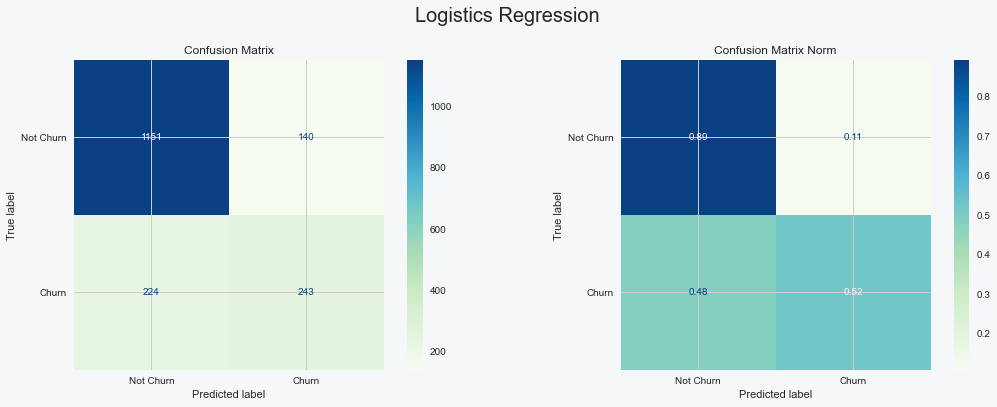

In [ ]:
confusion_matrix_plot(logr, X_test_scaled, Y_test, "Logistics Regression")

Despite the overall accuracy being quite good with a rate of almost 80%, however the precision and recall score of the model are not acceptable yet (0.63 and 0.52 respectively). As we are focusing on improving the company's ability identify a churned customer, we would like to improve our model toward its ability not to label as positive a sample that is negative as well as to indetify all the positive label.

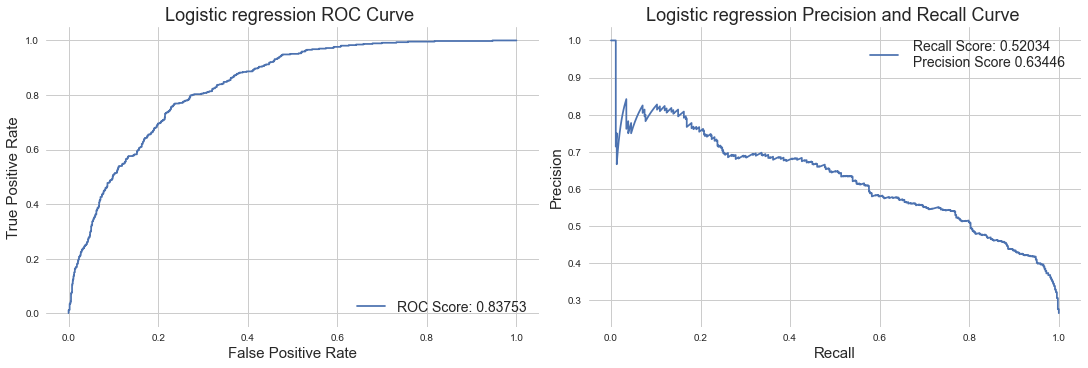

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_logr ,Y_test, logr.predict_proba(X_test_scaled), "Logistic regression")

The limitation of the model can also be noticed from the Precision and Recall Curve as the best model can be found from the curve can only have a balanced <b> precision score and recall score </b> in the range of 0.5 to 0.6 and the<b> F1 Score </b> is only 0.57 although the <b>accuracy score</b> of the model is quite goood.

<AxesSubplot:ylabel='Churn'>

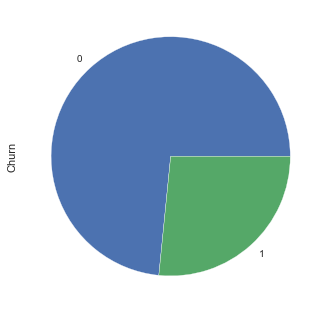

In [ ]:
Y_train.value_counts().plot.pie()

One obstacle hinders the model to indentify churn customer is because churn customer record proportion is not equal to that of its counterpart. Therefore, we will use SMOTE technique to synthesize new examples for the minority class, which can enhance the model recall and precison score.

#### Logistics Regression using SMOTE

Now, we use SMOTE to generate synthetic data **in the training set only**. 

In [ ]:
SM = SMOTE(sampling_strategy = 1, k_neighbors= 5)

In [ ]:
X_train_os, Y_train_os = SM.fit_resample(X_train_scaled, Y_train)

Text(0.5, 1.0, 'Before Oversampling')

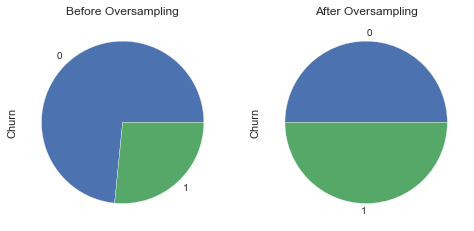

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols= 2)
Y_train_os.value_counts().plot.pie(ax = ax[1])
ax[1].set_title("After Oversampling")
Y_train.value_counts().plot.pie(ax = ax[0])
ax[0].set_title("Before Oversampling")

In [ ]:
logr_os = LogisticRegression(max_iter= 1000)
logr_os.fit(X_train_os, Y_train_os)

Y_hat_logr_os = logr_os.predict(X_test_scaled)

The performance of the logistic regression with SMOTE is as below. 

In [ ]:
Tab_logr_smote = metrics_scoring_table(Y_hat_logr_os, Y_test, "Logistics Regression SMOTE")
Tab_logr_smote

,model,accuracy score,precision score,recall score,f1 score
0,Logistics Regression SMOTE,0.741183,0.508174,0.798715,0.621149


In [ ]:
print(classification_report( Y_test, Y_hat_logr_os))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1291
           1       0.51      0.80      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



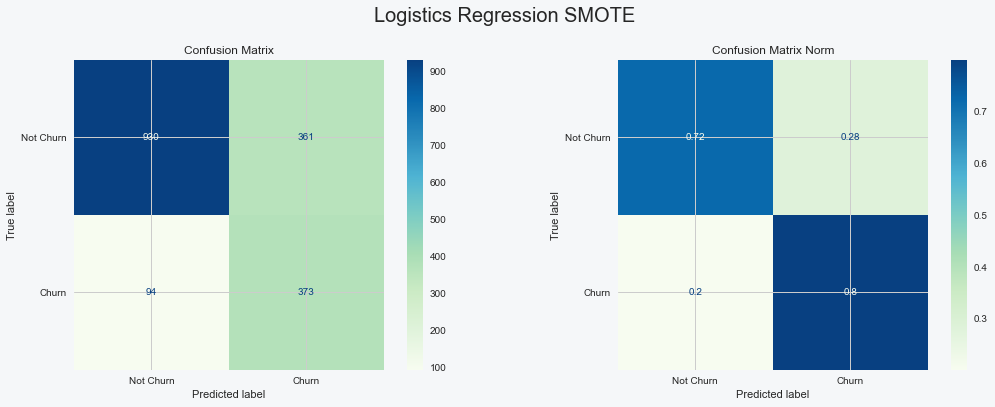

In [ ]:
confusion_matrix_plot(logr_os, X_test_scaled, Y_test, "Logistics Regression SMOTE")

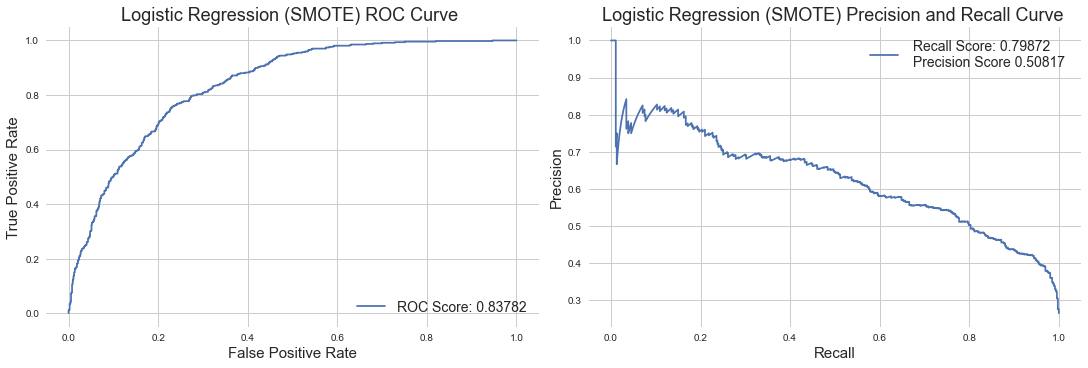

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_logr_os, Y_test, logr_os.predict_proba(X_test_scaled), "Logistic Regression (SMOTE)")

As we focus on improving the recall and precision score there is merely any improvement in ROC score. The recall score has significantly risen from 0.52 to 0.80 as a result of synthesizing minority class to facilitate the model capability to identify churned customers.

#### Logistic Regression with SMOTE and hyperparameter optimization with GridSearch

In [ ]:
CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

In [ ]:
param_grid_logr = [    
    {'penalty' : [ 'l2', 'none'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : ['lbfgs','liblinear'],
    
    }
]

In [ ]:
grid_search_logr = GridSearchCV(logr_os, param_grid_logr, cv = CV, scoring= "recall" , refit= True, verbose= True)

In [ ]:
grid_search_logr.fit(X_train_os, Y_train_os)

Fitting 15 folds for each of 40 candidates, totalling 600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                          'penalty': ['l2', 'none'],
                          'solver': ['lbfgs', 'liblinear']}],
             scoring='recall', verbose=True)

In [ ]:
best_logr = grid_search_logr.best_estimator_

In [ ]:
best_logr.fit(X_train_os,Y_train_os)

LogisticRegression(C=0.0001, max_iter=1000, solver='liblinear')

In [ ]:
Y_hat_best_logr = best_logr.predict(X_test_scaled)
Y_prob_best_logr = best_logr.predict_proba(X_test_scaled)

In [ ]:
Tab_logr_tuned = metrics_scoring_table(Y_hat_best_logr, Y_test, "Logistics Regression (Tuned)")

In [ ]:
print(classification_report(Y_test, Y_hat_best_logr))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66      1291
           1       0.39      0.85      0.53       467

    accuracy                           0.61      1758
   macro avg       0.65      0.68      0.60      1758
weighted avg       0.77      0.61      0.63      1758



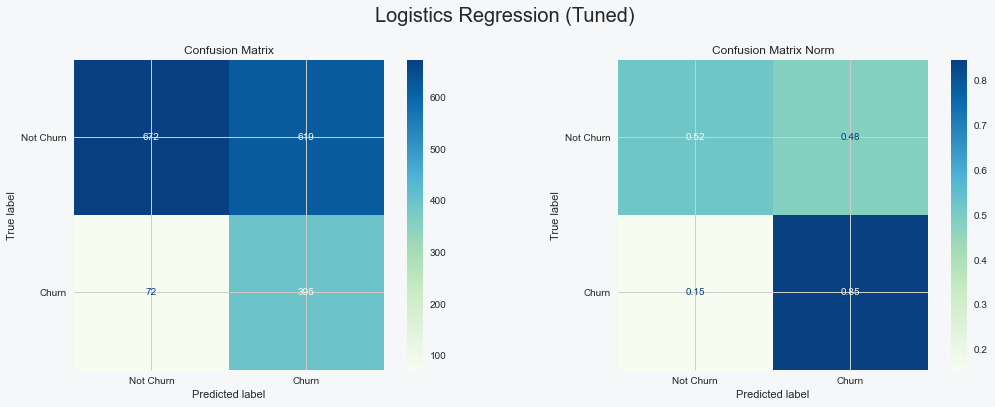

In [ ]:
confusion_matrix_plot(best_logr, X_test_scaled, Y_test, "Logistics Regression (Tuned)" )

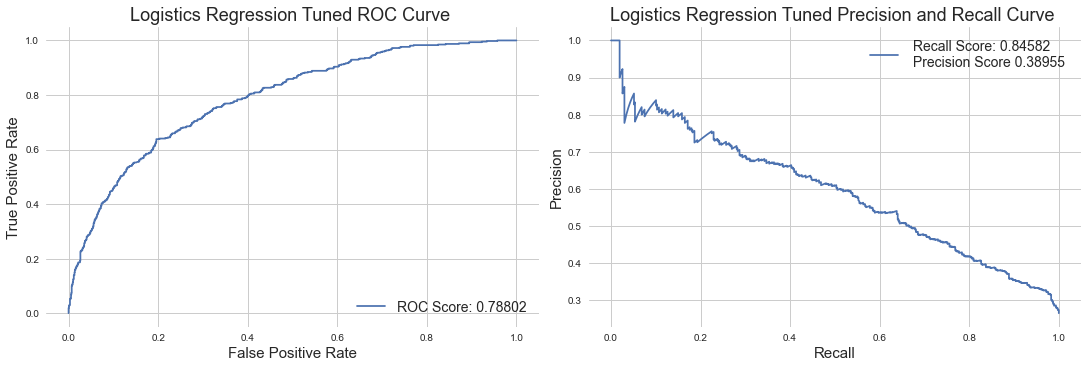

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_logr, Y_test, Y_prob_best_logr, "Logistics Regression Tuned")

### 5.4. K Nearest Neighbors model

#### K Nearest Neighbors using SMOTE

In [ ]:
knn_os = KNeighborsClassifier(n_neighbors= 5 , p = 2)

In [ ]:
knn_os.fit(X_train_os, Y_train_os)

KNeighborsClassifier()

In [ ]:
Y_hat_knn_os = knn_os.predict(X_test_scaled)

In [ ]:
Y_prob_knn_os = knn_os.predict_proba(X_test_scaled)

In [ ]:
Tab_knn_smote = metrics_scoring_table(Y_hat_knn_os, Y_test, "K Nearest Neighbors (SMOTE)")
Tab_knn_smote

,model,accuracy score,precision score,recall score,f1 score
0,K Nearest Neighbors (SMOTE),0.744027,0.513514,0.691649,0.589416


In [ ]:
print(classification_report(Y_test, Y_hat_knn_os))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1291
           1       0.51      0.69      0.59       467

    accuracy                           0.74      1758
   macro avg       0.69      0.73      0.70      1758
weighted avg       0.78      0.74      0.75      1758



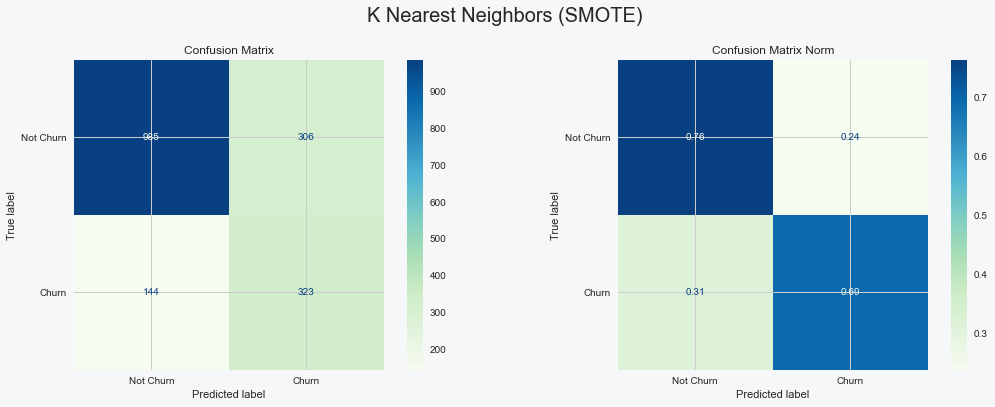

In [ ]:
confusion_matrix_plot(knn_os, X_test_scaled, Y_test, "K Nearest Neighbors (SMOTE)")

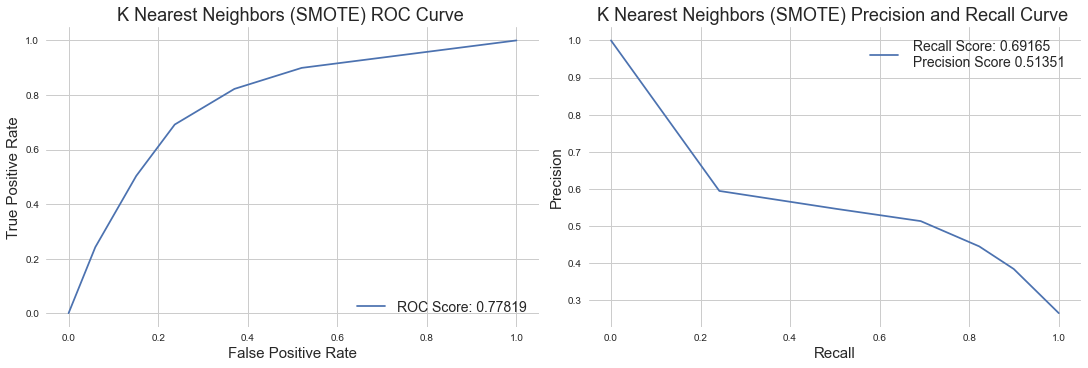

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_knn_os, Y_test, Y_prob_knn_os, "K Nearest Neighbors (SMOTE)")

#### K nearest neighbors with SMOTE and hyperparameter optimization using GridSearch

In [ ]:
knn_tuned = KNeighborsClassifier()

In [ ]:
knn_params = {  "n_neighbors": range(1, 22, 1), 
                "metric": [ "minkowski", "euclid" ]
             }

#grid search
grid_search_knn = RandomizedSearchCV(knn_tuned, knn_params , cv=CV, scoring= "recall", n_iter= 100, verbose = True)

In [ ]:
grid_search_knn.fit(X_train_os, Y_train_os)

Fitting 15 folds for each of 42 candidates, totalling 630 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
                   estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'metric': ['minkowski', 'euclid'],
                                        'n_neighbors': range(1, 22)},
                   scoring='recall', verbose=True)

In [ ]:
best_knn = grid_search_knn.best_estimator_

In [ ]:
Y_hat_best_knn = best_knn.predict(X_test_scaled)

In [ ]:
Y_prob_best_knn = best_knn.predict_proba(X_test_scaled)

In [ ]:
Tab_knn_tuned = metrics_scoring_table(Y_hat_best_knn, Y_test, "K Nearest Neighbors Tuned")
Tab_knn_tuned

,model,accuracy score,precision score,recall score,f1 score
0,K Nearest Neighbors Tuned,0.744596,0.513043,0.75803,0.611927


In [ ]:
print(classification_report(Y_test, Y_hat_best_knn))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1291
           1       0.51      0.76      0.61       467

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.79      0.74      0.76      1758



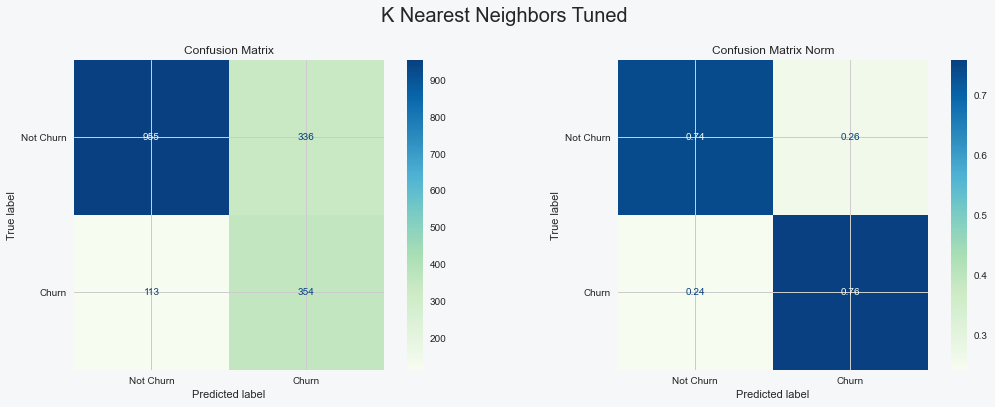

In [ ]:
confusion_matrix_plot(best_knn, X_test_scaled, Y_test, "K Nearest Neighbors Tuned" )

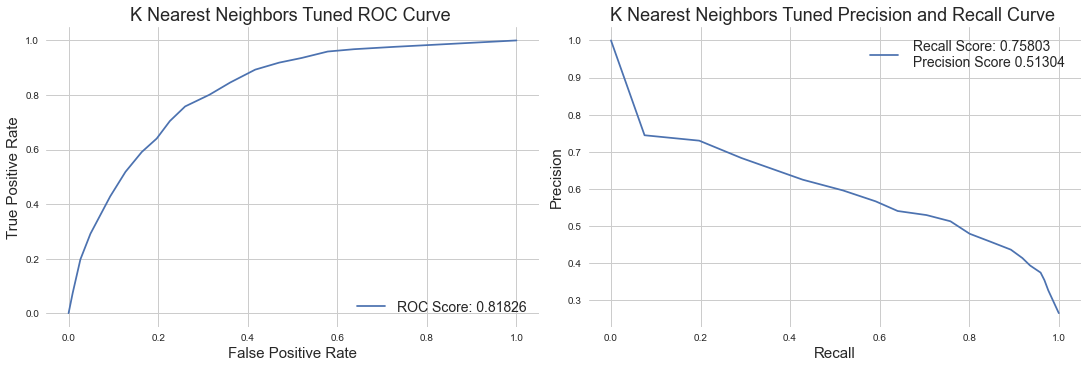

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_knn, Y_test, Y_prob_best_knn, "K Nearest Neighbors Tuned")

### 5.5. Random Forest model

#### Random Forest using SMOTE

In [ ]:
RF_os = RandomForestClassifier()

In [ ]:
RF_os.fit(X_train_os, Y_train_os)

RandomForestClassifier()

In [ ]:
Y_hat_rf_os = RF_os.predict(X_test_scaled)
Y_prob_rf_os = RF_os.predict_proba(X_test_scaled)

In [ ]:
Tab_rf_smote = metrics_scoring_table(Y_hat_rf_os, Y_test, "Random Forest (SMOTE)")
Tab_rf_smote

,model,accuracy score,precision score,recall score,f1 score
0,Random Forest (SMOTE),0.734357,0.5,0.558887,0.527806


In [ ]:
print(classification_report(Y_test, Y_hat_rf_os))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1291
           1       0.50      0.56      0.53       467

    accuracy                           0.73      1758
   macro avg       0.67      0.68      0.67      1758
weighted avg       0.74      0.73      0.74      1758



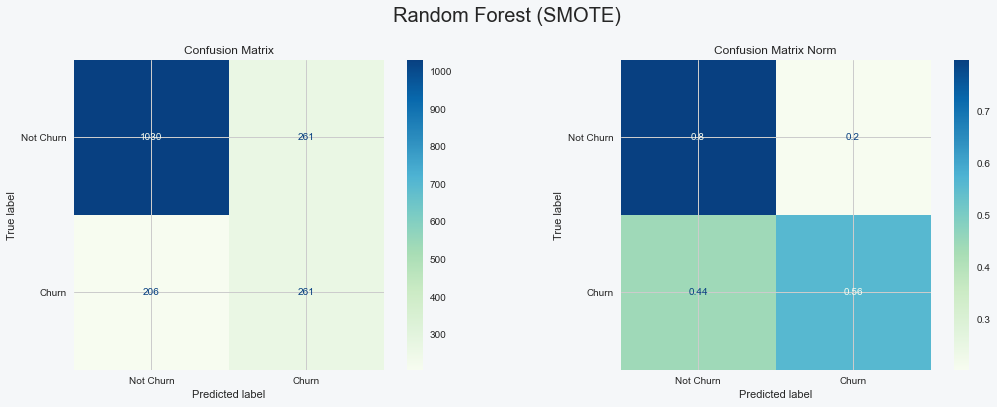

In [ ]:
confusion_matrix_plot(RF_os, X_test_scaled, Y_test , "Random Forest (SMOTE)")

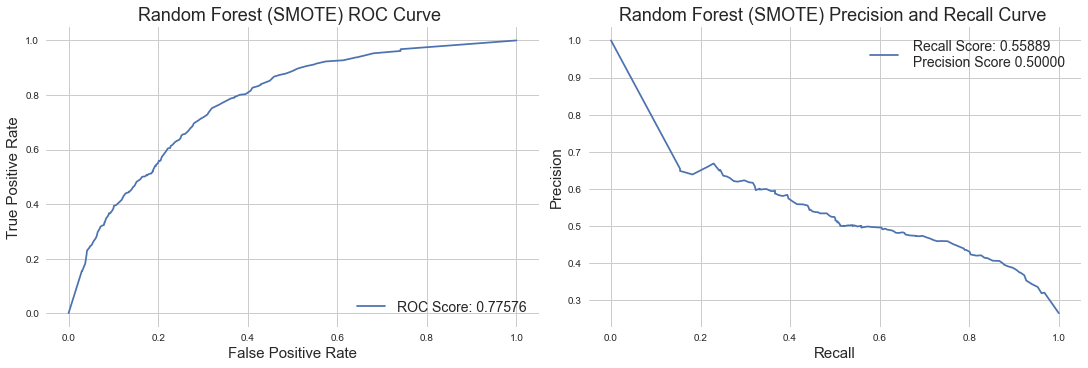

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_rf_os, Y_test, Y_prob_rf_os, "Random Forest (SMOTE)")

#### Random forest with SMOTE and hyperparameters tuning with GridSearchCV

In [ ]:
RF_tuned = RandomForestClassifier()

In [ ]:
n_estimators = np.arange(82, 90, 1) 
max_depth = np.arange(1,3,1) 
grid_RF_params = {'n_estimators': n_estimators, 'criterion' : [ 'entropy'], 'max_depth': max_depth, 'max_features': ['sqrt']}

In [ ]:
grid_RF_cv = GridSearchCV(RF_tuned, grid_RF_params, scoring = 'recall', refit = True, cv=CV, verbose=1)  

In [ ]:
grid_RF_cv.fit(X_train_os, Y_train_os) 

Fitting 15 folds for each of 16 candidates, totalling 240 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': array([1, 2]),
                         'max_features': ['sqrt'],
                         'n_estimators': array([82, 83, 84, 85, 86, 87, 88, 89])},
             scoring='recall', verbose=1)

In [ ]:
best_RF = grid_RF_cv.best_estimator_

In [ ]:
best_RF.fit(X_train_os, Y_train_os)

RandomForestClassifier(criterion='entropy', max_depth=1, n_estimators=86)

In [ ]:
Y_hat_best_rf = best_RF.predict(X_test_scaled)
Y_prob_best_rf = best_RF.predict_proba(X_test_scaled)

In [ ]:
Tab_rf_tuned = metrics_scoring_table(Y_hat_best_rf, Y_test, "Random Forest Tuned")
Tab_rf_tuned

,model,accuracy score,precision score,recall score,f1 score
0,Random Forest Tuned,0.651877,0.424084,0.867238,0.56962


In [ ]:
print(classification_report(Y_test, Y_hat_best_rf))

              precision    recall  f1-score   support

           0       0.92      0.57      0.71      1291
           1       0.42      0.87      0.57       467

    accuracy                           0.65      1758
   macro avg       0.67      0.72      0.64      1758
weighted avg       0.79      0.65      0.67      1758



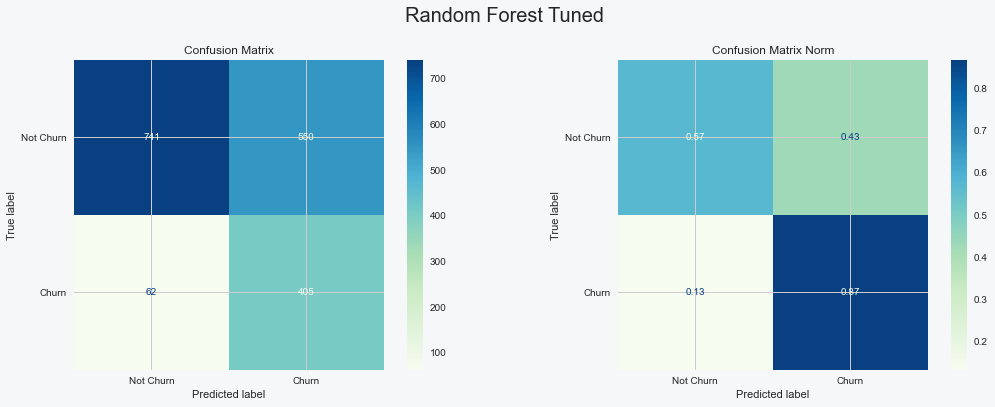

In [ ]:
confusion_matrix_plot(best_RF, X_test_scaled, Y_test, "Random Forest Tuned")

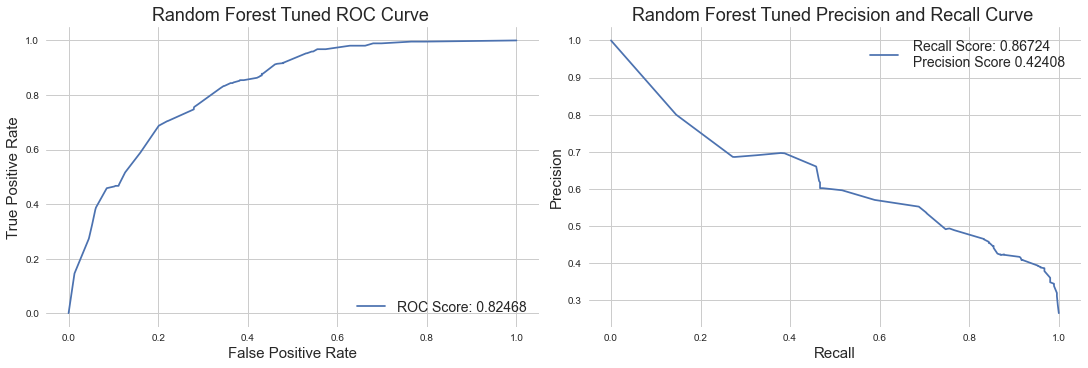

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_rf, Y_test, Y_prob_best_rf, "Random Forest Tuned")

### 5.6. SVC model

#### SVC using SMOTE

In [ ]:
svc_os = SVC(probability= True) 

In [ ]:
svc_os.fit(X_train_os, Y_train_os)

SVC(probability=True)

In [ ]:
Y_hat_svc_os = svc_os.predict(X_test_scaled)
Y_prob_svc_os = svc_os.predict_proba(X_test_scaled)

In [ ]:
Tab_svc_smote = metrics_scoring_table(Y_hat_svc_os, Y_test, "SVC (SMOTE)")
Tab_svc_smote

,model,accuracy score,precision score,recall score,f1 score
0,SVC (SMOTE),0.736064,0.50203,0.794433,0.615257


In [ ]:
print(classification_report(Y_test, Y_hat_svc_os))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.79      0.62       467

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.75      1758



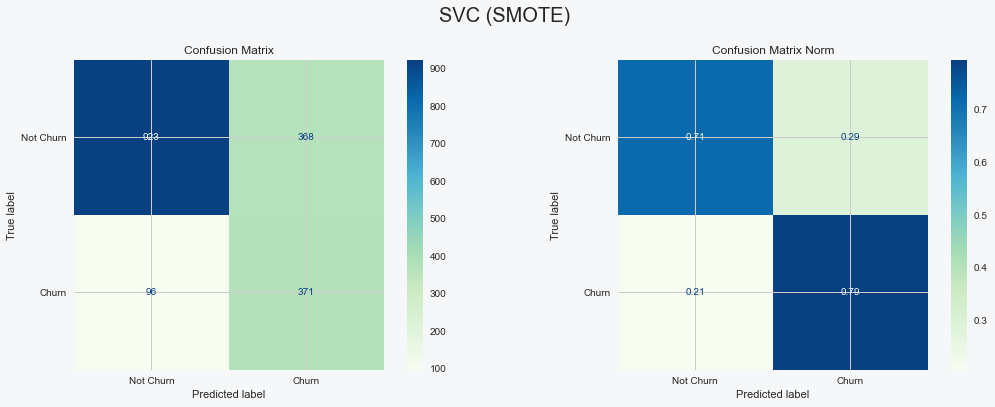

In [ ]:
confusion_matrix_plot(svc_os, X_test_scaled, Y_test, "SVC (SMOTE)")

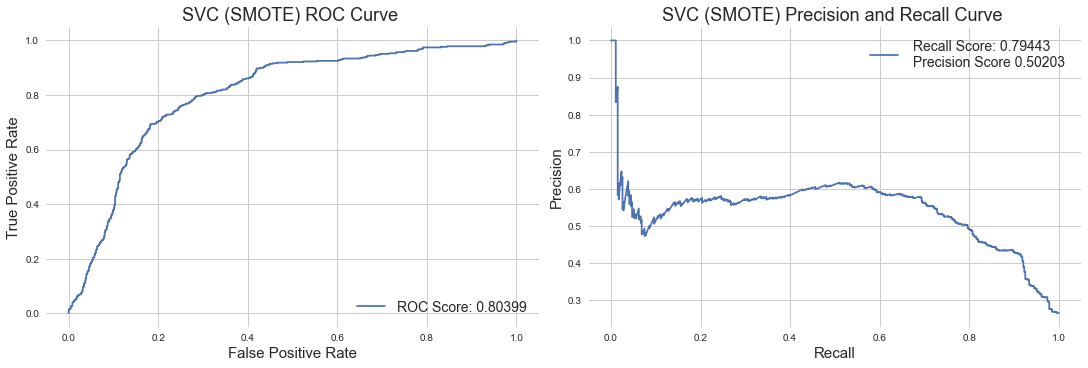

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_svc_os, Y_test, Y_prob_svc_os, "SVC (SMOTE)")

#### SVC with SMOTE and hyperparameters tuning using GridSearchCV

In [ ]:
svc_tuned = SVC(probability= True)

In [ ]:
random_svc_params = {'kernel': ['sigmoid'],'C':  [0.0009, 0.001] }

In [ ]:
grid_svc_cv = GridSearchCV(svc_tuned, random_svc_params, scoring = 'recall', refit = True, cv=CV, verbose=1)  

In [ ]:
grid_svc_cv.fit(X_train_os, Y_train_os)

Fitting 15 folds for each of 2 candidates, totalling 30 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=SVC(probability=True),
             param_grid={'C': [0.0009, 0.001], 'kernel': ['sigmoid']},
             scoring='recall', verbose=1)

In [ ]:
best_svc = grid_svc_cv.best_estimator_

In [ ]:
best_svc.fit(X_train_os, Y_train_os)

SVC(C=0.0009, kernel='sigmoid', probability=True)

In [ ]:
Y_hat_best_svc = best_svc.predict(X_test_scaled)
Y_prob_best_svc = best_svc.predict_proba(X_test_scaled)

In [ ]:
Tab_svc_tuned =  metrics_scoring_table(Y_hat_best_svc, Y_test, "SVC (Tuned)")
Tab_svc_tuned

,model,accuracy score,precision score,recall score,f1 score
0,SVC (Tuned),0.612059,0.392392,0.8394,0.534789


In [ ]:
print(classification_report(Y_test, Y_hat_best_svc))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67      1291
           1       0.39      0.84      0.53       467

    accuracy                           0.61      1758
   macro avg       0.65      0.68      0.60      1758
weighted avg       0.77      0.61      0.63      1758



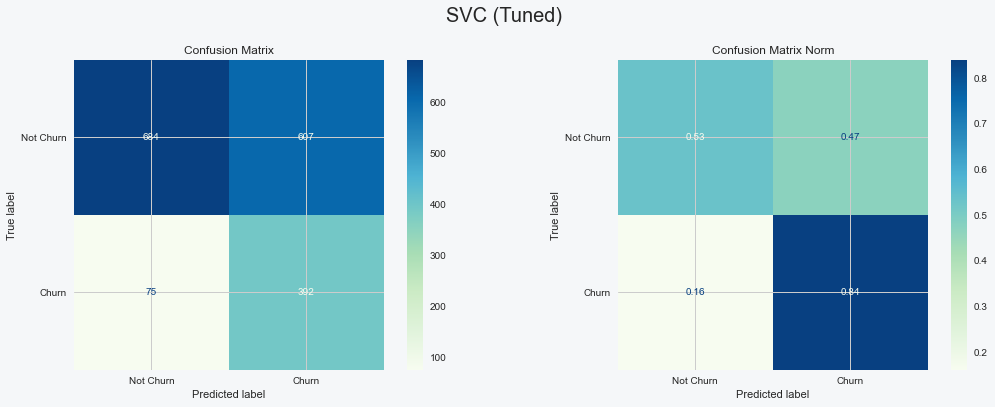

In [ ]:
confusion_matrix_plot(best_svc, X_test_scaled, Y_test, "SVC (Tuned)")

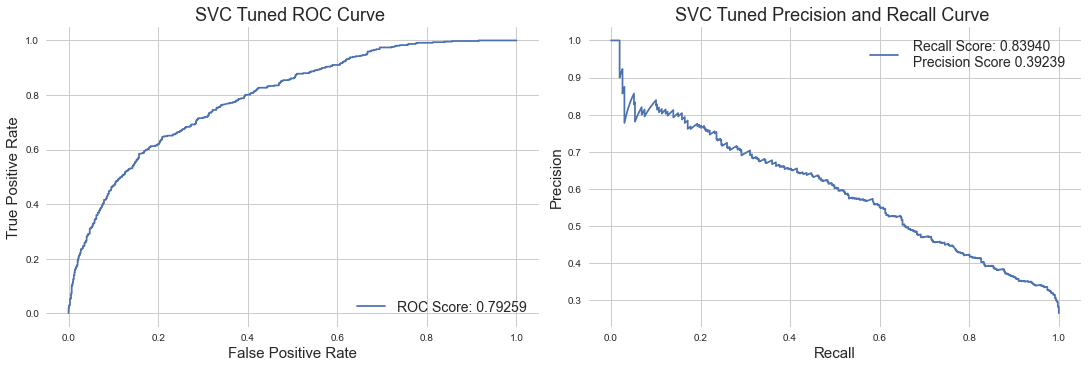

In [ ]:
roc_curve_and_precision_recall_plot(Y_hat_best_svc, Y_test, Y_prob_best_svc, "SVC Tuned")

## Summary

Below we have listed the metrics for different models (untuned & tuned) that we applied: 

In [ ]:
df_sum = pd.concat([Tab_knn_smote, Tab_knn_tuned,Tab_logr_smote, Tab_logr_tuned, Tab_rf_smote, Tab_rf_tuned, Tab_svc_smote, Tab_svc_tuned])
df_sum.sort_values(by = "recall score", ascending= False)

,model,accuracy score,precision score,recall score,f1 score
0,Random Forest Tuned,0.651877,0.424084,0.867238,0.569620
0,Logistics Regression (Tuned),0.606940,0.389546,0.845824,0.533423
0,SVC (Tuned),0.612059,0.392392,0.839400,0.534789
0,Logistics Regression SMOTE,0.741183,0.508174,0.798715,0.621149
0,SVC (SMOTE),0.736064,0.502030,0.794433,0.615257
0,K Nearest Neighbors Tuned,0.744596,0.513043,0.758030,0.611927
0,K Nearest Neighbors (SMOTE),0.744027,0.513514,0.691649,0.589416
0,Random Forest (SMOTE),0.734357,0.500000,0.558887,0.527806


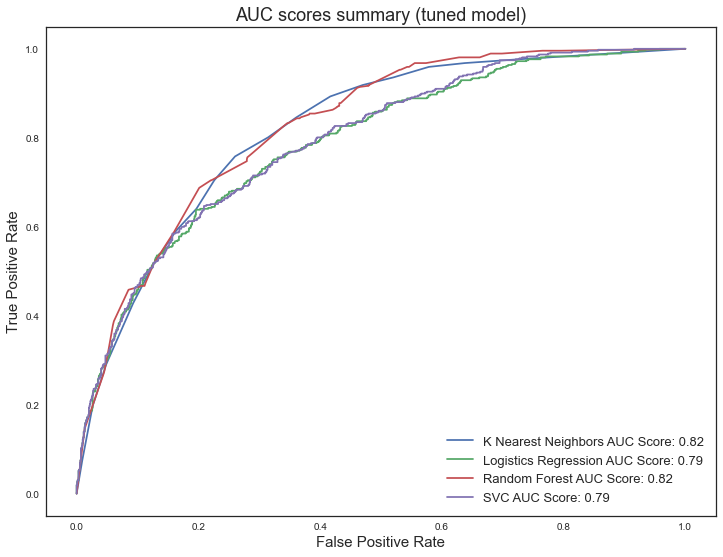

In [ ]:
roc_summary_plot(Y_test, [Y_prob_best_knn, Y_prob_best_logr, Y_prob_best_rf, Y_prob_best_svc],
                         ["K Nearest Neighbors", "Logistics Regression", "Random Forest", "SVC"])

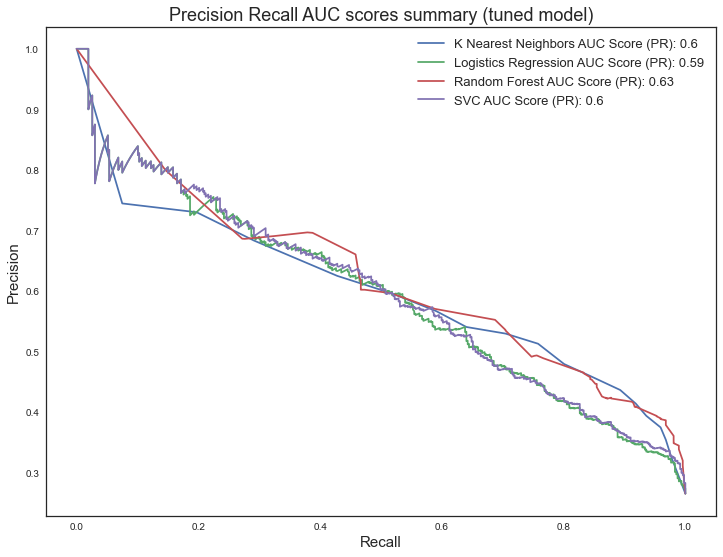

In [ ]:
precision_and_recall_curve_summary(Y_test, [Y_prob_best_knn, Y_prob_best_logr, Y_prob_best_rf, Y_prob_best_svc],
                         ["K Nearest Neighbors", "Logistics Regression", "Random Forest", "SVC"])

### Conclusion

<b> Random Forest </b> is the best model that we selected.